# 1년 이내에 올라온 무한도전 오분순삭 크롤링

기획의도 : 가장 좋아하던 프로그램이 무한도전이라서 유튜브로 무한도전 오분순삭을 많이             시청합니다. 무한도전은 인기가 많아 영상 조회수가 백만이 넘는 영상들이 
          많은데 1년 이내 올라온 영상들의 경우 조회수가 백만이 넘는 영상들이 많지 
          않다는 것을 알게 되었습니다.
          저는 무한도전 오분순삭 크롤링하여 무한도전 오분순삭 영상 50개를 뽑아 
          조회수가 백만 넘는게 몇 개인지를 분석하고, 조회수 높은 순으로 나열하여 
          그래프를 만들고, 각 영상들 맨 위에 있는 댓글에서 빈출단어를 뽑아내 댓글에             어떤 단어들이 많이 쓰여지는지를 한눈에 볼 수 있도록 시각화하였습니다.

In [75]:
import scipy as sp
import pandas as pd
import numpy as np

from selenium import webdriver  
from selenium.webdriver import ActionChains as AC
from selenium.webdriver.common.keys import Keys 
import chromedriver_autoinstaller
from tqdm import tqdm
from tqdm import tqdm_notebook
import re
from time import sleep
import time
import requests
from bs4 import BeautifulSoup
%matplotlib inline
import os
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz             
from sklearn.tree import export_graphviz

from konlpy.tag import Kkma       ; kkma = Kkma()
from konlpy.tag import Hannanum   ; hannanum = Hannanum()
from konlpy.tag import Okt        ; t = Okt()
from konlpy.tag import *
import pickle

# matplotlib 그래프 한글폰트 깨질 때 대처(Mac & Window)
import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')
    
# 그래프에서 마이너스 기호가 표시되도록 하는 설정
matplotlib.rcParams['axes.unicode_minus'] = False

# 워닝 무시
import warnings
warnings.filterwarnings('ignore')

In [76]:
keywords = ['무한도전 오분순삭']
keyword = keywords[0]
keyword
n=50

In [77]:
# 크롬창 띄우기
chrome_path = chromedriver_autoinstaller.install()
driver = webdriver.Chrome(chrome_path)

driver.get("https://www.youtube.com/results?search_query={}".format(keywords[0]))  # 
time.sleep(2)

In [65]:
# 필터 - 조회수 기준 정렬
driver.find_element_by_link_text('필터').click()
time.sleep(1)
driver.find_element_by_link_text('올해').click()
time.sleep(1)

In [66]:
#스크롤 내리기
e = driver.find_element_by_tag_name('body')
for i in range(20):
    e.send_keys(Keys.PAGE_DOWN)
    time.sleep(1)

In [6]:
 # 영상 제목 크롤링
overlays = "#video-title > yt-formatted-string"
titles = driver.find_elements_by_css_selector(overlays)
title_list = []
for i in range(n):
    title = titles[i].text
    title_list.append(title)
time.sleep(2)
title_list

['재미가 없지만 지식조차 없는.. 길이는 무엇일까요? | 무한도전⏱오분순삭 MBC100220방송',
 '🎉경 존버당 축🎉 겉절이랑 쩌리짱은 손으로 찢어야 제맛 | 무한도전⏱오분순삭 MBC120121방송',
 '새해엔 역시 연애,,사랑,,그리고 결혼 발표💍 | 무한도전⏱오분순삭 MBC080308방송',
 '당황해서 바보 컨셉 까먹은 천재탱커 | 무한도전⏱오분순삭 MBC100807방송',
 '솔직,뻔뻔,당당함의 표본 명수.zip ★내맘대로 십분순삭★ | 무한도전⏱오분순삭 MBC120804방송',
 'ㅇㅈ? ㅇㅇㅈ! | 무한도전⏱오분순삭 MBC110219방송',
 '🎉경 존버당 축🎉 언젠가는 잡혀가게~🎶 부르다 보면 익숙한 노래 모음.zip | 무한도전⏱오분순삭 MBC110625방송',
 '마씨 가문 무한며느리들의 (파)전의 전쟁⚡ | 무한도전⏱오분순삭 MBC080913방송',
 '맘만 먹으면 재석이 명수 다 이기는 길이 | 무한도전⏱오분순삭 MBC090509방송',
 '지상렬은 어떻게 이름도 지상렬 | 무한도전⏱오분순삭 MBC060826방송',
 '꿈과 희망을 루팡합니다💨 조금 일찍 찌든 무도어른이들 | 무한도전⏱오분순삭 MBC140208방송',
 '탱커도 밟으면 꿈틀.zip | 무한도전⏱오분순삭 MBC120929방송',
 '사랑인 듯 사랑 아닌 사랑같은..❤ 애증의 하와수 티키타카 모음3🤼 | 무한도전⏱오분순삭 MBC070113방송',
 '이젠 전국민이 다 아는 돈키호테 엮은이 김경식씨 | 무한도전⏱오분순삭 MBC120929방송',
 '🎉경 존버당 축🎉 무도 제8의 멤버 김태호PD 모음.zip | 무한도전⏱오분순삭 MBC160625방송',
 '👋손은 입보다 빠르니까,,,💨 정형돈 편집각 손짓.zip | 무한도전⏱오분순삭 MBC110319방송',
 '🎉경 존버당 축🎉 "윌리스 수고했어" 입에 착착 붙는 강제 개명 모음.zip | 무한도전⏱오분순삭 MBC070303방송',
 '🎉경 존버당 축🎉 하루에 변기 한 통 정도 먹는 준하 | 무한도전⏱오분순삭 MBC1101

In [7]:
# | 기준으로 앞 제목만 추출 
t_list =[]
for i in range(0,50):
    title = title_list[i].split(' | ')[0]
    t_list.append(title)
    
t_list

['재미가 없지만 지식조차 없는.. 길이는 무엇일까요?',
 '🎉경 존버당 축🎉 겉절이랑 쩌리짱은 손으로 찢어야 제맛',
 '새해엔 역시 연애,,사랑,,그리고 결혼 발표💍',
 '당황해서 바보 컨셉 까먹은 천재탱커',
 '솔직,뻔뻔,당당함의 표본 명수.zip ★내맘대로 십분순삭★',
 'ㅇㅈ? ㅇㅇㅈ!',
 '🎉경 존버당 축🎉 언젠가는 잡혀가게~🎶 부르다 보면 익숙한 노래 모음.zip',
 '마씨 가문 무한며느리들의 (파)전의 전쟁⚡',
 '맘만 먹으면 재석이 명수 다 이기는 길이',
 '지상렬은 어떻게 이름도 지상렬',
 '꿈과 희망을 루팡합니다💨 조금 일찍 찌든 무도어른이들',
 '탱커도 밟으면 꿈틀.zip',
 '사랑인 듯 사랑 아닌 사랑같은..❤ 애증의 하와수 티키타카 모음3🤼',
 '이젠 전국민이 다 아는 돈키호테 엮은이 김경식씨',
 '🎉경 존버당 축🎉 무도 제8의 멤버 김태호PD 모음.zip',
 '👋손은 입보다 빠르니까,,,💨 정형돈 편집각 손짓.zip',
 '🎉경 존버당 축🎉 "윌리스 수고했어" 입에 착착 붙는 강제 개명 모음.zip',
 '🎉경 존버당 축🎉 하루에 변기 한 통 정도 먹는 준하',
 '맞춤법 좀 몰라도 세종대왕님은 이해해주실거야..★한글날 기념 십분순삭★',
 '뚱보+뚱뚱뚱보=뚱뚱뚱뚱뾰',
 '청문회 모니터링 해오는 정성👀 공개 코미디 출신 명수옹의 패러디 모음.zip',
 '✨명수 + 숫자 = 레전드✨ n00만 드립 모음.zip',
 '세번을 했는데 드럽게 재미없어요',
 '앤디워홀이 길 어록을 들어봤다면..대단하다고 했게따아~★내맘대로 십분순삭★| 무한도전⏱오분순삭 MBC090509방송',
 '🎉경 존버당 축🎉 CEO 명수의 치킨 사랑',
 '웃긴구간 아니겠지하고 안심해서 물 마시지마세요.이건 무도예요',
 '전국 직장인 10:00~11:30 주업무 = 오늘 점심 메뉴 고르기',
 '🎉경 존버당 축🎉 시도 때도 없이 하하 호출해서 훈계하는 유부장 모먼트',
 '기획만 했다 하면 ✨레전드✨ 아.뱅. 정형돈 PD',
 '저주 약

In [8]:
# 정규표현식으로 방영날짜만 추출
regex ='\d{6}'

# re.match() 함수로 group화
date_list=re.findall(regex,str(title_list))
date_list


['100220',
 '120121',
 '080308',
 '100807',
 '120804',
 '110219',
 '110625',
 '080913',
 '090509',
 '060826',
 '140208',
 '120929',
 '070113',
 '120929',
 '160625',
 '110319',
 '070303',
 '110101',
 '141011',
 '091010',
 '140719',
 '141213',
 '110820',
 '090509',
 '060128',
 '080705',
 '111008',
 '110521',
 '071020',
 '130727',
 '111210',
 '110219',
 '080405',
 '180310',
 '130309',
 '100807',
 '070818',
 '091003',
 '140510',
 '170429',
 '130420',
 '130720',
 '110101',
 '090725',
 '120929',
 '080202',
 '090509',
 '080705',
 '081011',
 '150110']

In [9]:
 # 조회수 크롤링
overlays = "#metadata-line > span:nth-child(1)"
views = driver.find_elements_by_css_selector(overlays)
view_list = []
for i in range(n):
    view = views[i].text.split(' ')[1]
    if '만회' in view:
        view = view.replace('만회','')
        if '.' in view:   
            view = int(view.replace('.',''))*1000
        else:
            view = int(view)*10000
    view_list.append(view)
time.sleep(2)

# 동영상 url수집

In [67]:
# url 수집하기
things = driver.find_elements_by_class_name('yt-simple-endpoint.inline-block.style-scope.ytd-thumbnail')  

url_list = []
for thing in things:
    url = thing.get_attribute('href')
    url_list.append(url)
    
url_list

[None,
 'https://www.youtube.com/watch?v=NSQltP1aau8',
 'https://www.youtube.com/watch?v=IsmbK4ceKIQ',
 'https://www.youtube.com/watch?v=PpdJIgEgnm4',
 'https://www.youtube.com/watch?v=gBjkdNbQApY',
 'https://www.youtube.com/watch?v=qB6hnUdMZ8g',
 'https://www.youtube.com/watch?v=0KYVxJ55atI',
 'https://www.youtube.com/watch?v=8HwO-GvLR3M',
 'https://www.youtube.com/watch?v=_moUN4npV2A',
 'https://www.youtube.com/watch?v=BMv9f6x_EjA',
 'https://www.youtube.com/watch?v=kTZDrP7w9X4',
 'https://www.youtube.com/watch?v=XfrHTKWRL-g',
 'https://www.youtube.com/watch?v=ZPufn_J0EQQ',
 'https://www.youtube.com/watch?v=aUNd8Km6h3Q',
 'https://www.youtube.com/watch?v=-tONw0bBgus',
 'https://www.youtube.com/watch?v=7cVM9PnUnzo',
 'https://www.youtube.com/watch?v=Uef7_hOWBNI',
 'https://www.youtube.com/watch?v=BusfJ4WSEdk',
 'https://www.youtube.com/watch?v=2U-wXB7rglg',
 'https://www.youtube.com/watch?v=puuqTKSD0jY',
 'https://www.youtube.com/watch?v=ZNLhWSsaeXU',
 'https://www.youtube.com/watch?v

In [68]:
url_list = url_list[1:51]
url_list

['https://www.youtube.com/watch?v=NSQltP1aau8',
 'https://www.youtube.com/watch?v=IsmbK4ceKIQ',
 'https://www.youtube.com/watch?v=PpdJIgEgnm4',
 'https://www.youtube.com/watch?v=gBjkdNbQApY',
 'https://www.youtube.com/watch?v=qB6hnUdMZ8g',
 'https://www.youtube.com/watch?v=0KYVxJ55atI',
 'https://www.youtube.com/watch?v=8HwO-GvLR3M',
 'https://www.youtube.com/watch?v=_moUN4npV2A',
 'https://www.youtube.com/watch?v=BMv9f6x_EjA',
 'https://www.youtube.com/watch?v=kTZDrP7w9X4',
 'https://www.youtube.com/watch?v=XfrHTKWRL-g',
 'https://www.youtube.com/watch?v=ZPufn_J0EQQ',
 'https://www.youtube.com/watch?v=aUNd8Km6h3Q',
 'https://www.youtube.com/watch?v=-tONw0bBgus',
 'https://www.youtube.com/watch?v=7cVM9PnUnzo',
 'https://www.youtube.com/watch?v=Uef7_hOWBNI',
 'https://www.youtube.com/watch?v=BusfJ4WSEdk',
 'https://www.youtube.com/watch?v=2U-wXB7rglg',
 'https://www.youtube.com/watch?v=puuqTKSD0jY',
 'https://www.youtube.com/watch?v=ZNLhWSsaeXU',
 'https://www.youtube.com/watch?v=cpiQ2H

In [69]:
print(len(url_list))

50


In [70]:
#저장
df = pd.DataFrame({"url":url_list})
df.to_csv('infinite_challenge_urls.csv')  

# 댓글 수집

In [14]:
keywords = ['무한도전 오분순삭']
keyword = keywords[0]
keyword
n=50

In [15]:
# 크롬창 띄우기
chrome_path = chromedriver_autoinstaller.install()
driver = webdriver.Chrome(chrome_path)

driver.get("https://www.youtube.com/results?search_query={}".format(keywords[0]))  # 
time.sleep(2)

In [16]:
# 필터 - 조회수 기준 정렬
driver.find_element_by_link_text('필터').click()
time.sleep(1)
driver.find_element_by_link_text('올해').click()
time.sleep(1)

In [17]:
# 첫번째 영상 클릭
CSS_tran="#video-title > yt-formatted-string"                         
driver.find_element_by_css_selector(CSS_tran).click()   # 사진 클릭
time.sleep(1)

In [18]:
#스크롤 내리기
e = driver.find_element_by_tag_name('body')
for i in range(3):
    e.send_keys(Keys.PAGE_DOWN)
    time.sleep(1)

In [19]:
# comments 수집하기
comment_list = []

overlays1 = "#content-text.style-scope.ytd-comment-renderer"
comments = driver.find_elements_by_css_selector(overlays1)

for comment in tqdm(comments):    
    comment = comment.text
    comment_list.append(comment)

print(len(comment_list))
comment_list

100%|██████████| 20/20 [00:00<00:00, 36.33it/s]

20


['존버 요청은 여기 대댓으로 달아주세요! (๑•̀ㅂ•́)و✧\n\n🖤무한도전 회차 정보 알리미🖤\n무도레전드: 길 어록 모음 3',
 '무도에서 길의 웃음 포인트 \n1. 순수한 무근본 멘트(예- ‘형, 요즘 벌이도 안좋은데’)\n2. 웃길 의도 없는 동작인데 빵터짐\n(예- 준비, 차려)',
 '진짜 7인체제는 레전드다 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ\n멤버들 웃는 표정만 봐도 내가 다 행복해..',
 '길이의 재석이형 시리즈는 진짜 늘 저항없이 웃게 됨 ㅋㅋㅋㅋㅋㅋㅋㅋ ㅋ ㅋㅋ ㅋ ㅋ ㅋ\nㅋㅋ\nㅋㅋ ㅋㅋㅋ ㅋㅋ ㅋ ㅋ ㅋㅋ ㅋㅋㅋ',
 'ㅋㅋㅋㅋㅋㅋㅋㅋ진짜 노잼이라고 하는데 뜬금없는 길씨 행동이 너무좋다 ㅋㅋㅋㅋㅋㅋ 그립다 무도,, 다시 돌아오면 ㅠㅠㅠㅠ',
 '예능 역사에 다시는 없을 완벽한 7인이었다.\n당시에도 재밌었는데 지금보니까 더 재밌어..\n매주 새로운 컨텐츠로 도전하고 웃음줬던 무한도전. 늙어서도 평생 볼듯ㅠㅠ',
 '십년이 지나도 여전히 재밌고 트렌디한 무한도전을 다시 보여주며 우리에게 순수한 웃음을 안겨주는',
 '리쌍으로 엄청난 카리스마를 갖고있는 길이라는 가수가 이렇게까지 예능적으로 망가질수있다는 새로운면을 보여준 무도....',
 '길 멘트중에 제일 위험했던건 형수님 드립이지\n그건 지금 봐도 놀람 난 ㅋㅋㅋㅋㅋㅋㅋㅋ',
 '3:12 웬만하면 안 웃는 박명수가 빵 터졌네 ㅋㅋㅋㅋㅋㅋㅋ',
 '그 때는 좀 그랬는데 지금보니 진짜 무도에 너무 맞는 캐릭터임ㅋㅋㅋ',
 '3:12 만연히는 어케 참았는데 지지적이고가 너무 웃겨서 실실 웃었는데ㅋㅋㅋㅋㅋ 옆에서 홍철이가 넣는 추임새도 웃기고',
 '2:32 “밑에 뭐야?” \n“도전의 당계” ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 말투가 너무 웃곀ㅋㅋ',
 '나한테 길이형은 아픈 손가락임...\n들어왔을 땐 떨떠름 했다가 그래도 이왕 들어온거 잘했으면 싶다가도 밉상이기도 하고...\n그리고 13년도부터 조금씩 웃기기 시작하면서 잘하는 것 같다가도 막상 나가니까 마음 아프면서도 원망스럽기도 하고 이렇게라도

# for문으로 데이터 수집하기

영상 제목, 조회수, 방영날짜 크롤링

In [20]:
n =50
keywords = ['무한도전 오분순삭']

In [21]:
for keyword in keywords:
    # 크롬창 띄우기
    chrome_path = chromedriver_autoinstaller.install()
    driver = webdriver.Chrome(chrome_path)

    driver.get("https://www.youtube.com/results?search_query={}".format(keyword))  
    time.sleep(2)
    
    # 필터 - 조회수 기준 정렬
    driver.find_element_by_link_text('필터').click()
    time.sleep(1)
    driver.find_element_by_link_text('올해').click()
    time.sleep(3)

    e = driver.find_element_by_tag_name('body')
    for i in range(20):
        e.send_keys(Keys.PAGE_DOWN)
        time.sleep(1)
    
    
    # 영상 제목 크롤링
    overlays = "#video-title > yt-formatted-string"
    titles = driver.find_elements_by_css_selector(overlays)
    title_list = []
    for i in range(n):
        title = titles[i].text
        title_list.append(title)
    time.sleep(2)
    
    
    # 조회수 크롤링
    overlays = "#metadata-line > span:nth-child(1)"
    views = driver.find_elements_by_css_selector(overlays)
    view_list = []
    for i in range(n):
        view = views[i].text.split(' ')[1]
        if '만회' in view:
            view = view.replace('만회','')
            if '.' in view:   
                view = int(view.replace('.',''))*1000
            else:
                view = int(view)*10000
               
        
        view_list.append(view)
    time.sleep(2)
    
    # 판다스로 만들기
    df1 = pd.DataFrame({'title':title_list, 'view':view_list})


In [22]:
#정규표현식으로 방영날짜 추출
regex ='\d{6}'

# re.match() 함수로 group화
date_list=re.findall(regex,str(title_list))
date_list

['120121',
 '100807',
 '120804',
 '080308',
 '110219',
 '080913',
 '100220',
 '060826',
 '110625',
 '090509',
 '070113',
 '120929',
 '160625',
 '140208',
 '120929',
 '110319',
 '091010',
 '070303',
 '110820',
 '110101',
 '161112',
 '080112',
 '090509',
 '080202',
 '141213',
 '060128',
 '080705',
 '141011',
 '071020',
 '110521',
 '130727',
 '111210',
 '080405',
 '110219',
 '111008',
 '180310',
 '100327',
 '110910',
 '130309',
 '070818',
 '100807',
 '140510',
 '170429',
 '130420',
 '091003',
 '130720',
 '110101',
 '090725',
 '120929',
 '090509']

In [23]:
# 첫번째 열에 방영날짜 넣기
df1.insert(0, 'Date', date_list)

In [24]:
#제목 추출
t_list =[]
for i in range(0,50):
    title = title_list[i].split(' | ')[0]
    t_list.append(title)
    
t_list

['🎉경 존버당 축🎉 겉절이랑 쩌리짱은 손으로 찢어야 제맛',
 '당황해서 바보 컨셉 까먹은 천재탱커',
 '솔직,뻔뻔,당당함의 표본 명수.zip ★내맘대로 십분순삭★',
 '새해엔 역시 연애,,사랑,,그리고 결혼 발표💍',
 'ㅇㅈ? ㅇㅇㅈ!',
 '마씨 가문 무한며느리들의 (파)전의 전쟁⚡',
 '재미가 없지만 지식조차 없는.. 길이는 무엇일까요?',
 '지상렬은 어떻게 이름도 지상렬',
 '🎉경 존버당 축🎉 언젠가는 잡혀가게~🎶 부르다 보면 익숙한 노래 모음.zip',
 '맘만 먹으면 재석이 명수 다 이기는 길이',
 '사랑인 듯 사랑 아닌 사랑같은..❤ 애증의 하와수 티키타카 모음3🤼',
 '탱커도 밟으면 꿈틀.zip',
 '🎉경 존버당 축🎉 무도 제8의 멤버 김태호PD 모음.zip',
 '꿈과 희망을 루팡합니다💨 조금 일찍 찌든 무도어른이들',
 '이젠 전국민이 다 아는 돈키호테 엮은이 김경식씨',
 '👋손은 입보다 빠르니까,,,💨 정형돈 편집각 손짓.zip',
 '뚱보+뚱뚱뚱보=뚱뚱뚱뚱뾰',
 '🎉경 존버당 축🎉 "윌리스 수고했어" 입에 착착 붙는 강제 개명 모음.zip',
 '세번을 했는데 드럽게 재미없어요',
 '🎉경 존버당 축🎉 하루에 변기 한 통 정도 먹는 준하',
 '어디까지나 〰무도 짤로 드라마 한 편 뚝딱📺',
 '[무도] “자면 안..도ㅐ…😪” 두려움이 육체를 지배하기 시작했다,,, 여섯 겁쟁이들의 눈물겨운 사투zZ ‘용궁 특집’ 1편 MBC080112방송',
 '앤디워홀이 길 어록을 들어봤다면..대단하다고 했게따아~★내맘대로 십분순삭★| 무한도전⏱오분순삭 MBC090509방송',
 '쥐포 때문에 결렬된 협상..메뚜기의 난(亂)! 휴게소에서도 분량 뽑는 멤버들',
 '✨명수 + 숫자 = 레전드✨ n00만 드립 모음.zip',
 '🎉경 존버당 축🎉 CEO 명수의 치킨 사랑',
 '웃긴구간 아니겠지하고 안심해서 물 마시지마세요.이건 무도예요',
 '맞춤법 좀 몰라도 세종대왕님은 이해해주실거야..★한글날 기념 십분순삭★',
 '기획만 했다 

In [25]:
df1['title'] = t_list
df1

,Date,title,view
0,120121,🎉경 존버당 축🎉 겉절이랑 쩌리짱은 손으로 찢어야 제맛,200000
1,100807,당황해서 바보 컨셉 까먹은 천재탱커,970000
2,120804,"솔직,뻔뻔,당당함의 표본 명수.zip ★내맘대로 십분순삭★",1480000
3,080308,"새해엔 역시 연애,,사랑,,그리고 결혼 발표💍",230000
4,110219,ㅇㅈ? ㅇㅇㅈ!,870000
5,080913,마씨 가문 무한며느리들의 (파)전의 전쟁⚡,850000
6,100220,재미가 없지만 지식조차 없는.. 길이는 무엇일까요?,140000
7,060826,지상렬은 어떻게 이름도 지상렬,1230000
8,110625,🎉경 존버당 축🎉 언젠가는 잡혀가게~🎶 부르다 보면 익숙한 노래 모음.zip,1870000
9,090509,맘만 먹으면 재석이 명수 다 이기는 길이,1180000


In [71]:
# 저장해둔 url 불러오기
df = pd.read_csv('infinite_challenge_urls.csv')
df['url']

0     https://www.youtube.com/watch?v=NSQltP1aau8
1     https://www.youtube.com/watch?v=IsmbK4ceKIQ
2     https://www.youtube.com/watch?v=PpdJIgEgnm4
3     https://www.youtube.com/watch?v=gBjkdNbQApY
4     https://www.youtube.com/watch?v=qB6hnUdMZ8g
5     https://www.youtube.com/watch?v=0KYVxJ55atI
6     https://www.youtube.com/watch?v=8HwO-GvLR3M
7     https://www.youtube.com/watch?v=_moUN4npV2A
8     https://www.youtube.com/watch?v=BMv9f6x_EjA
9     https://www.youtube.com/watch?v=kTZDrP7w9X4
10    https://www.youtube.com/watch?v=XfrHTKWRL-g
11    https://www.youtube.com/watch?v=ZPufn_J0EQQ
12    https://www.youtube.com/watch?v=aUNd8Km6h3Q
13    https://www.youtube.com/watch?v=-tONw0bBgus
14    https://www.youtube.com/watch?v=7cVM9PnUnzo
15    https://www.youtube.com/watch?v=Uef7_hOWBNI
16    https://www.youtube.com/watch?v=BusfJ4WSEdk
17    https://www.youtube.com/watch?v=2U-wXB7rglg
18    https://www.youtube.com/watch?v=puuqTKSD0jY
19    https://www.youtube.com/watch?v=ZNLhWSsaeXU


In [72]:
len(df['url'])

50

In [73]:
dict={}

n = len(df['url'])    # 전체 수 : len(df['url'])

for i in range(0, n):   
    try:
        chrome_path = chromedriver_autoinstaller.install()
        driver = webdriver.Chrome(chrome_path)       
        driver.get(df['url'][i])
        time.sleep(1)
        
        e = driver.find_element_by_tag_name('body')
        for j in range(3):
            e.send_keys(Keys.PAGE_DOWN)
            time.sleep(1)
        
        # comments 수집하기
        overlays1 = "#content-text.style-scope.ytd-comment-renderer"
        comments = driver.find_elements_by_css_selector(overlays1)
       
        comment_list = []
        for comment in comments:    
            comment = comment.text
            comment_list.append(comment)
        
        dict[i] = comment_list[1]
        
        driver.close()
       
        
    except:
        dict[i] = 'nan'
        driver.close()
        continue
        
dict

{0: '그저 예능 역사상 최고의 탱커\n어느순간 공격하는 법을 깨닫기 시작한 정준하는 \n어느새 예능에서 최고의 사기 캐릭터가 되어 있었음..',
 1: '전체적으로 볼때는 잘 몰랐는데 오분순삭으로 주나형만 모아놓으면 겁나 웃김ㅋㅋㅋㅋㅋㅋㅋㅋㅋ',
 2: '01:37 이땐 어려서 잘 몰라가지고 마냥 웃었는데 나중에보니 진짜 홍철이형 멘탈보고 정말 놀랐네요. 그런 사고를 겪으시고도 저런 드립을 칠 수 있다는게 진짜 ㅋㅋㅋㅋㅋㅋ 멤버들 눈치보면서 멘트치는게 너무 웃겨 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ',
 3: '시원하고 재밌음 ..\n타인은 상상하지 못 할 미움 받을 용기라는 자막 너무 좋다',
 4: '미스춘향, 디즈니 공주 분장과 함께 무도에서 전 멤버 여자 분장하면 떠오르는 며느리 분장ㅋㅋㅋㅋ 명수옹 진짜 시골에 살고 계신 우리 첫째 이모랑 복붙 ㅋㅋㅋㅋㅋㅋ',
 5: '인정하는 명수라서 명수가 주인공인줄 알았는데 거의 쩌리짱 특집ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ',
 6: '7인체제는 진짜 전설이다',
 7: '진짜 지상렬님 마지막 지인 소개팅 하이라이트는 볼 때마다 레전드 같아요 인생 애드립입니다 정말 ㅋㅋ',
 8: '하와수 싸움은 유재석이 매번 부추겨서 너무 웃김ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ',
 9: '7:52 멤버들 다 같이 부르는거 넘 좋다ㅠㅠ',
 10: '2022년에도 무도 틀어놓고 살아야지',
 11: '박명수는 자기가 공격할 때는 좋아하면서 그걸 받아치면ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 진짜 당황하는게 너무 웃김ㅋㅋㅋㅋ',
 12: '무도에서 길의 웃음 포인트 \n1. 순수한 무근본 멘트(예- ‘형, 요즘 벌이도 안좋은데’)\n2. 웃길 의도 없는 동작인데 빵터짐\n(예- 준비, 차려)',
 13: '무도 멤버도 소중하지만, 그들을 이끌고 기발한 아이디어로 레전드 프로그램을 만든 김태호 pd도 대단한 사람임. 이제 남은건 그의 궁서체 자막 모음집 존버뿐',
 14: '난 아무리봐도 윌리스가 레전드임ㅋㅋㅋㅋㅋㅋㄱㅋㅋㅋㅋㅋㅋ 근데 또 잘어울렼ㅋㅋㅋㅋㅋㅋㅋㄱㅋㄱㅋㅋㄱㄲ',
 15

In [74]:
d = dict
len(d)

50

In [30]:
#key를 기준으로 오름차순 정렬
t = sorted(d.items())
t

[(0,
  '무도에서 길의 웃음 포인트 \n1. 순수한 무근본 멘트(예- ‘형, 요즘 벌이도 안좋은데’)\n2. 웃길 의도 없는 동작인데 빵터짐\n(예- 준비, 차려)'),
 (1,
  '그저 예능 역사상 최고의 탱커\n어느순간 공격하는 법을 깨닫기 시작한 정준하는 \n어느새 예능에서 최고의 사기 캐릭터가 되어 있었음..'),
 (2,
  '01:37 이땐 어려서 잘 몰라가지고 마냥 웃었는데 나중에보니 진짜 홍철이형 멘탈보고 정말 놀랐네요. 그런 사고를 겪으시고도 저런 드립을 칠 수 있다는게 진짜 ㅋㅋㅋㅋㅋㅋ 멤버들 눈치보면서 멘트치는게 너무 웃겨 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ'),
 (3, '전체적으로 볼때는 잘 몰랐는데 오분순삭으로 주나형만 모아놓으면 겁나 웃김ㅋㅋㅋㅋㅋㅋㅋㅋㅋ'),
 (4, '시원하고 재밌음 ..\n타인은 상상하지 못 할 미움 받을 용기라는 자막 너무 좋다'),
 (5, '인정하는 명수라서 명수가 주인공인줄 알았는데 거의 쩌리짱 특집ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ'),
 (6, '7:52 멤버들 다 같이 부르는거 넘 좋다ㅠㅠ'),
 (7,
  '미스춘향, 디즈니 공주 분장과 함께 무도에서 전 멤버 여자 분장하면 떠오르는 며느리 분장ㅋㅋㅋㅋ 명수옹 진짜 시골에 살고 계신 우리 첫째 이모랑 복붙 ㅋㅋㅋㅋㅋㅋ'),
 (8, '7인체제는 진짜 전설이다'),
 (9, '진짜 지상렬님 마지막 지인 소개팅 하이라이트는 볼 때마다 레전드 같아요 인생 애드립입니다 정말 ㅋㅋ'),
 (10, '2022년에도 무도 틀어놓고 살아야지'),
 (11, '박명수는 자기가 공격할 때는 좋아하면서 그걸 받아치면ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 진짜 당황하는게 너무 웃김ㅋㅋㅋㅋ'),
 (12, '하와수 싸움은 유재석이 매번 부추겨서 너무 웃김ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ'),
 (13, '뭔가 웃길라고 하는게 아니라 진짜 특유의 아무것도 모르는 순수한 두뇌에서 나오는 드립이라 개웃김 ㅋㅋㅋㅋㅋㅋㅋㅋ'),
 (14,
  '무도 멤버도 소중하지만, 그들을 이끌고 기발한 아이디어로 레전드 프로그램을 만든 

In [31]:
# sorted를 쓰니 튜플로 된 리스트로 바껴서 튜플안에 있는 것 중 뒤에꺼만 가져오고 다시 리스트로 만들었다
c_list = []
n = 50
i = 0
while i < n:
    _,a = t[i]
    c_list.append(a)
    i = i+1

c_list

['무도에서 길의 웃음 포인트 \n1. 순수한 무근본 멘트(예- ‘형, 요즘 벌이도 안좋은데’)\n2. 웃길 의도 없는 동작인데 빵터짐\n(예- 준비, 차려)',
 '그저 예능 역사상 최고의 탱커\n어느순간 공격하는 법을 깨닫기 시작한 정준하는 \n어느새 예능에서 최고의 사기 캐릭터가 되어 있었음..',
 '01:37 이땐 어려서 잘 몰라가지고 마냥 웃었는데 나중에보니 진짜 홍철이형 멘탈보고 정말 놀랐네요. 그런 사고를 겪으시고도 저런 드립을 칠 수 있다는게 진짜 ㅋㅋㅋㅋㅋㅋ 멤버들 눈치보면서 멘트치는게 너무 웃겨 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ',
 '전체적으로 볼때는 잘 몰랐는데 오분순삭으로 주나형만 모아놓으면 겁나 웃김ㅋㅋㅋㅋㅋㅋㅋㅋㅋ',
 '시원하고 재밌음 ..\n타인은 상상하지 못 할 미움 받을 용기라는 자막 너무 좋다',
 '인정하는 명수라서 명수가 주인공인줄 알았는데 거의 쩌리짱 특집ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ',
 '7:52 멤버들 다 같이 부르는거 넘 좋다ㅠㅠ',
 '미스춘향, 디즈니 공주 분장과 함께 무도에서 전 멤버 여자 분장하면 떠오르는 며느리 분장ㅋㅋㅋㅋ 명수옹 진짜 시골에 살고 계신 우리 첫째 이모랑 복붙 ㅋㅋㅋㅋㅋㅋ',
 '7인체제는 진짜 전설이다',
 '진짜 지상렬님 마지막 지인 소개팅 하이라이트는 볼 때마다 레전드 같아요 인생 애드립입니다 정말 ㅋㅋ',
 '2022년에도 무도 틀어놓고 살아야지',
 '박명수는 자기가 공격할 때는 좋아하면서 그걸 받아치면ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 진짜 당황하는게 너무 웃김ㅋㅋㅋㅋ',
 '하와수 싸움은 유재석이 매번 부추겨서 너무 웃김ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ',
 '뭔가 웃길라고 하는게 아니라 진짜 특유의 아무것도 모르는 순수한 두뇌에서 나오는 드립이라 개웃김 ㅋㅋㅋㅋㅋㅋㅋㅋ',
 '무도 멤버도 소중하지만, 그들을 이끌고 기발한 아이디어로 레전드 프로그램을 만든 김태호 pd도 대단한 사람임. 이제 남은건 그의 궁서체 자막 모음집 존버뿐',
 '9:28 커버장인 장범준도 따라하지 못한 원곡자의 위엄',
 '난 아무리봐도 

In [32]:
df2 = pd.DataFrame(c_list,columns = ['comment'])

In [33]:
df3 = pd.concat([df1,df2], axis=1)

In [34]:
df3 = df3.sort_values(by=['view'], ascending=False)
df3

,Date,title,view,comment
34,111008,전국 직장인 10:00~11:30 주업무 = 오늘 점심 메뉴 고르기,4170000,홍카 모음이 있다는게 대단ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
14,120929,이젠 전국민이 다 아는 돈키호테 엮은이 김경식씨,3000000,"무도 멤버도 소중하지만, 그들을 이끌고 기발한 아이디어로 레전드 프로그램을 만든 김..."
42,170429,태어난 김에 무도하는 명수형 모음.zip,2910000,시상식에서까지 저렇게 망가지면서 시청자들을 웃기고 싶어하는 개그맨들이 또 있을까싶다...
35,180310,게스트 씹뜯맛즐.zip,2650000,"공채 개그맨 출신 양세형, 조세호도 적응 못한 무도 멤버 자리를 완벽히 소화한 힙합..."
31,111210,※스포주의※ 오징어게임 10분순삭 (a.k.a 만근추),2420000,둘이 어이없는답해도 바로 못웃고 유재석눈치보고 웃는게 킬포임 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
8,110625,🎉경 존버당 축🎉 언젠가는 잡혀가게~🎶 부르다 보면 익숙한 노래 모음.zip,1870000,7인체제는 진짜 전설이다
11,120929,탱커도 밟으면 꿈틀.zip,1840000,박명수는 자기가 공격할 때는 좋아하면서 그걸 받아치면ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 진짜 당황하...
2,120804,"솔직,뻔뻔,당당함의 표본 명수.zip ★내맘대로 십분순삭★",1480000,01:37 이땐 어려서 잘 몰라가지고 마냥 웃었는데 나중에보니 진짜 홍철이형 멘탈보...
22,090509,앤디워홀이 길 어록을 들어봤다면..대단하다고 했게따아~★내맘대로 십분순삭★| 무한도...,1430000,"저것도 다른 멤버가 아닌 꼭 명수옹이 해야 그느낌, 그발음이 제대로 살아날수 있음ㅋ..."
16,091010,뚱보+뚱뚱뚱보=뚱뚱뚱뚱뾰,1350000,난 아무리봐도 윌리스가 레전드임ㅋㅋㅋㅋㅋㅋㄱㅋㅋㅋㅋㅋㅋ 근데 또 잘어울렼ㅋㅋㅋㅋㅋㅋ...


In [35]:
df3['Range'] = ["more than million" if s >=1000000 else "less than million" for s in df3['view']]
df3

,Date,title,view,comment,Range
34,111008,전국 직장인 10:00~11:30 주업무 = 오늘 점심 메뉴 고르기,4170000,홍카 모음이 있다는게 대단ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ,more than million
14,120929,이젠 전국민이 다 아는 돈키호테 엮은이 김경식씨,3000000,"무도 멤버도 소중하지만, 그들을 이끌고 기발한 아이디어로 레전드 프로그램을 만든 김...",more than million
42,170429,태어난 김에 무도하는 명수형 모음.zip,2910000,시상식에서까지 저렇게 망가지면서 시청자들을 웃기고 싶어하는 개그맨들이 또 있을까싶다...,more than million
35,180310,게스트 씹뜯맛즐.zip,2650000,"공채 개그맨 출신 양세형, 조세호도 적응 못한 무도 멤버 자리를 완벽히 소화한 힙합...",more than million
31,111210,※스포주의※ 오징어게임 10분순삭 (a.k.a 만근추),2420000,둘이 어이없는답해도 바로 못웃고 유재석눈치보고 웃는게 킬포임 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ,more than million
8,110625,🎉경 존버당 축🎉 언젠가는 잡혀가게~🎶 부르다 보면 익숙한 노래 모음.zip,1870000,7인체제는 진짜 전설이다,more than million
11,120929,탱커도 밟으면 꿈틀.zip,1840000,박명수는 자기가 공격할 때는 좋아하면서 그걸 받아치면ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 진짜 당황하...,more than million
2,120804,"솔직,뻔뻔,당당함의 표본 명수.zip ★내맘대로 십분순삭★",1480000,01:37 이땐 어려서 잘 몰라가지고 마냥 웃었는데 나중에보니 진짜 홍철이형 멘탈보...,more than million
22,090509,앤디워홀이 길 어록을 들어봤다면..대단하다고 했게따아~★내맘대로 십분순삭★| 무한도...,1430000,"저것도 다른 멤버가 아닌 꼭 명수옹이 해야 그느낌, 그발음이 제대로 살아날수 있음ㅋ...",more than million
16,091010,뚱보+뚱뚱뚱보=뚱뚱뚱뚱뾰,1350000,난 아무리봐도 윌리스가 레전드임ㅋㅋㅋㅋㅋㅋㄱㅋㅋㅋㅋㅋㅋ 근데 또 잘어울렼ㅋㅋㅋㅋㅋㅋ...,more than million


In [36]:
#엑셀로 저장
df3.to_excel("infinite_challenge_content.xlsx", encoding='utf-8-sig')

In [37]:
#csv로 저장
df3.to_csv("infinite_challenge.csv", encoding='utf-8-sig')

# Pie Chart

조회수가 백만 이상인 영상과 백만 미만인 영상 수 비교

In [38]:
infinite_challenge = pd.read_csv('./infinite_challenge.csv', encoding='utf-8-sig')

In [39]:
# 튜플 형태로 라벨 지정
labels = 'less than million','more than million'
labels

('less than million', 'more than million')

In [40]:
# 차트를 입체적으로 보이게
explode = (0, 0.1)

In [41]:
infinite_challenge['Range'].value_counts()

less than million    35
more than million    15
Name: Range, dtype: int64

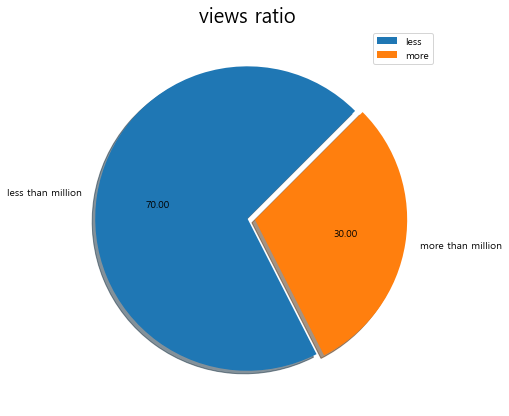

In [42]:
plt.figure(figsize=(7,7))

# pie chart 만들기(차트 띄우기, labels 달기, 각 조정, 그림자, 값 소숫점 표시)
plt.pie(infinite_challenge['Range'].value_counts(), explode=(0, 0.05), labels=labels, startangle=45, shadow=True, autopct='%.2f')

# 라벨, 타이틀 달기
plt.title('views ratio', fontsize=20)

# 레전드 달기
plt.legend(['less', 'more'], loc='upper right')  # upper, center, lower, right,left

plt.show()

# 조회수 높은 순으로 그래프 그리기

In [43]:
df3

,Date,title,view,comment,Range
34,111008,전국 직장인 10:00~11:30 주업무 = 오늘 점심 메뉴 고르기,4170000,홍카 모음이 있다는게 대단ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ,more than million
14,120929,이젠 전국민이 다 아는 돈키호테 엮은이 김경식씨,3000000,"무도 멤버도 소중하지만, 그들을 이끌고 기발한 아이디어로 레전드 프로그램을 만든 김...",more than million
42,170429,태어난 김에 무도하는 명수형 모음.zip,2910000,시상식에서까지 저렇게 망가지면서 시청자들을 웃기고 싶어하는 개그맨들이 또 있을까싶다...,more than million
35,180310,게스트 씹뜯맛즐.zip,2650000,"공채 개그맨 출신 양세형, 조세호도 적응 못한 무도 멤버 자리를 완벽히 소화한 힙합...",more than million
31,111210,※스포주의※ 오징어게임 10분순삭 (a.k.a 만근추),2420000,둘이 어이없는답해도 바로 못웃고 유재석눈치보고 웃는게 킬포임 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ,more than million
8,110625,🎉경 존버당 축🎉 언젠가는 잡혀가게~🎶 부르다 보면 익숙한 노래 모음.zip,1870000,7인체제는 진짜 전설이다,more than million
11,120929,탱커도 밟으면 꿈틀.zip,1840000,박명수는 자기가 공격할 때는 좋아하면서 그걸 받아치면ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 진짜 당황하...,more than million
2,120804,"솔직,뻔뻔,당당함의 표본 명수.zip ★내맘대로 십분순삭★",1480000,01:37 이땐 어려서 잘 몰라가지고 마냥 웃었는데 나중에보니 진짜 홍철이형 멘탈보...,more than million
22,090509,앤디워홀이 길 어록을 들어봤다면..대단하다고 했게따아~★내맘대로 십분순삭★| 무한도...,1430000,"저것도 다른 멤버가 아닌 꼭 명수옹이 해야 그느낌, 그발음이 제대로 살아날수 있음ㅋ...",more than million
16,091010,뚱보+뚱뚱뚱보=뚱뚱뚱뚱뾰,1350000,난 아무리봐도 윌리스가 레전드임ㅋㅋㅋㅋㅋㅋㄱㅋㅋㅋㅋㅋㅋ 근데 또 잘어울렼ㅋㅋㅋㅋㅋㅋ...,more than million


In [44]:
x = df3.index

In [45]:
# int값을 str 값으로 바꾸기
x = [str(i) for i in x]

print(type(x[0]))
print(x)

<class 'str'>
['34', '14', '42', '35', '31', '8', '11', '2', '22', '16', '7', '25', '9', '26', '28', '44', '1', '33', '4', '23', '5', '19', '18', '17', '45', '15', '12', '40', '10', '36', '24', '37', '27', '32', '48', '29', '13', '41', '49', '30', '3', '0', '21', '20', '38', '39', '6', '46', '47', '43']


In [46]:
view_list.sort(reverse=True)
y =view_list
y

[4170000,
 3000000,
 2910000,
 2650000,
 2420000,
 1870000,
 1840000,
 1480000,
 1430000,
 1350000,
 1230000,
 1180000,
 1180000,
 1120000,
 1040000,
 980000,
 970000,
 880000,
 870000,
 860000,
 850000,
 830000,
 820000,
 810000,
 770000,
 700000,
 680000,
 550000,
 480000,
 480000,
 460000,
 390000,
 380000,
 380000,
 360000,
 280000,
 270000,
 240000,
 240000,
 240000,
 230000,
 200000,
 170000,
 170000,
 160000,
 140000,
 140000,
 140000,
 120000,
 93000]

<BarContainer object of 50 artists>

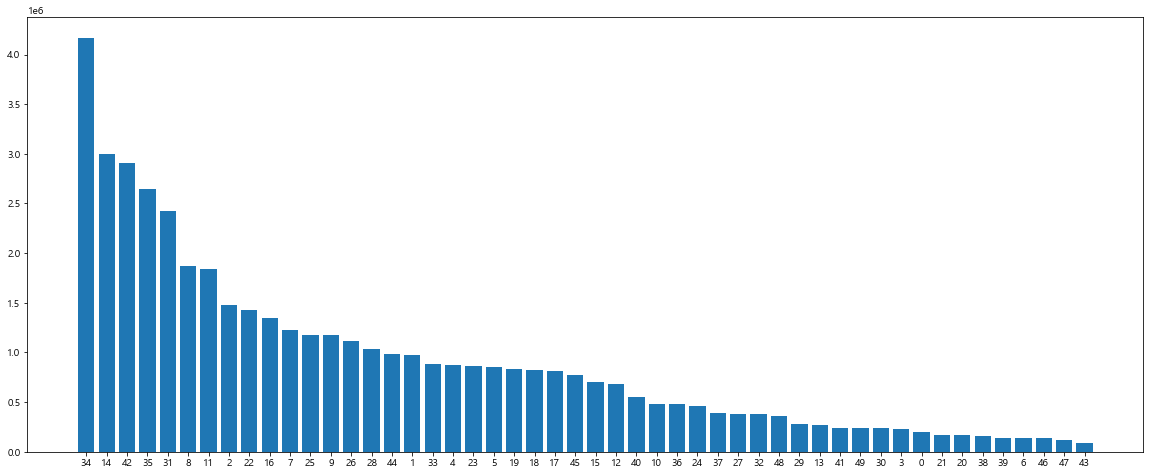

In [47]:
# figsize 지정
fig, barChart = plt.subplots(figsize=(20,8))

# bar chart에 x, y값 넣어서 bar chart 생성
barChart.bar(x, y)

# KoNLPy 시각화

In [48]:
print(c_list)
len(c_list)

['무도에서 길의 웃음 포인트 \n1. 순수한 무근본 멘트(예- ‘형, 요즘 벌이도 안좋은데’)\n2. 웃길 의도 없는 동작인데 빵터짐\n(예- 준비, 차려)', '그저 예능 역사상 최고의 탱커\n어느순간 공격하는 법을 깨닫기 시작한 정준하는 \n어느새 예능에서 최고의 사기 캐릭터가 되어 있었음..', '01:37 이땐 어려서 잘 몰라가지고 마냥 웃었는데 나중에보니 진짜 홍철이형 멘탈보고 정말 놀랐네요. 그런 사고를 겪으시고도 저런 드립을 칠 수 있다는게 진짜 ㅋㅋㅋㅋㅋㅋ 멤버들 눈치보면서 멘트치는게 너무 웃겨 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ', '전체적으로 볼때는 잘 몰랐는데 오분순삭으로 주나형만 모아놓으면 겁나 웃김ㅋㅋㅋㅋㅋㅋㅋㅋㅋ', '시원하고 재밌음 ..\n타인은 상상하지 못 할 미움 받을 용기라는 자막 너무 좋다', '인정하는 명수라서 명수가 주인공인줄 알았는데 거의 쩌리짱 특집ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ', '7:52 멤버들 다 같이 부르는거 넘 좋다ㅠㅠ', '미스춘향, 디즈니 공주 분장과 함께 무도에서 전 멤버 여자 분장하면 떠오르는 며느리 분장ㅋㅋㅋㅋ 명수옹 진짜 시골에 살고 계신 우리 첫째 이모랑 복붙 ㅋㅋㅋㅋㅋㅋ', '7인체제는 진짜 전설이다', '진짜 지상렬님 마지막 지인 소개팅 하이라이트는 볼 때마다 레전드 같아요 인생 애드립입니다 정말 ㅋㅋ', '2022년에도 무도 틀어놓고 살아야지', '박명수는 자기가 공격할 때는 좋아하면서 그걸 받아치면ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 진짜 당황하는게 너무 웃김ㅋㅋㅋㅋ', '하와수 싸움은 유재석이 매번 부추겨서 너무 웃김ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ', '뭔가 웃길라고 하는게 아니라 진짜 특유의 아무것도 모르는 순수한 두뇌에서 나오는 드립이라 개웃김 ㅋㅋㅋㅋㅋㅋㅋㅋ', '무도 멤버도 소중하지만, 그들을 이끌고 기발한 아이디어로 레전드 프로그램을 만든 김태호 pd도 대단한 사람임. 이제 남은건 그의 궁서체 자막 모음집 존버뿐', '9:28 커버장인 장범준도 따라하지 못한 원곡자의 위엄', '난 아무리봐도 윌리스가 레전드임ㅋㅋㅋㅋㅋㅋㄱ

50

In [49]:
import nltk
from konlpy.tag import Okt; t = Okt()

In [50]:
# 리스트 중 str 타입이 아닌 요소들(nan값)이 존재함을 확인
for i in c_list:
    if type(i) == float:
        i = str(i)
        print(i)

In [51]:
# str 타입이 아닌 요소들이 있으면 전부 str 타입으로 바꿔라!
for i in range(len(c_list)):
    if type(c_list[i]) != str:
        c_list[i] = str(c_list[i])

In [52]:
# 수집한 글들을 한 문장으로 합치기
c_text = ''

for each_line in c_list[:2000]:
    c_text = c_text + each_line + '\n'
    
c_text

'무도에서 길의 웃음 포인트 \n1. 순수한 무근본 멘트(예- ‘형, 요즘 벌이도 안좋은데’)\n2. 웃길 의도 없는 동작인데 빵터짐\n(예- 준비, 차려)\n그저 예능 역사상 최고의 탱커\n어느순간 공격하는 법을 깨닫기 시작한 정준하는 \n어느새 예능에서 최고의 사기 캐릭터가 되어 있었음..\n01:37 이땐 어려서 잘 몰라가지고 마냥 웃었는데 나중에보니 진짜 홍철이형 멘탈보고 정말 놀랐네요. 그런 사고를 겪으시고도 저런 드립을 칠 수 있다는게 진짜 ㅋㅋㅋㅋㅋㅋ 멤버들 눈치보면서 멘트치는게 너무 웃겨 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ\n전체적으로 볼때는 잘 몰랐는데 오분순삭으로 주나형만 모아놓으면 겁나 웃김ㅋㅋㅋㅋㅋㅋㅋㅋㅋ\n시원하고 재밌음 ..\n타인은 상상하지 못 할 미움 받을 용기라는 자막 너무 좋다\n인정하는 명수라서 명수가 주인공인줄 알았는데 거의 쩌리짱 특집ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ\n7:52 멤버들 다 같이 부르는거 넘 좋다ㅠㅠ\n미스춘향, 디즈니 공주 분장과 함께 무도에서 전 멤버 여자 분장하면 떠오르는 며느리 분장ㅋㅋㅋㅋ 명수옹 진짜 시골에 살고 계신 우리 첫째 이모랑 복붙 ㅋㅋㅋㅋㅋㅋ\n7인체제는 진짜 전설이다\n진짜 지상렬님 마지막 지인 소개팅 하이라이트는 볼 때마다 레전드 같아요 인생 애드립입니다 정말 ㅋㅋ\n2022년에도 무도 틀어놓고 살아야지\n박명수는 자기가 공격할 때는 좋아하면서 그걸 받아치면ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 진짜 당황하는게 너무 웃김ㅋㅋㅋㅋ\n하와수 싸움은 유재석이 매번 부추겨서 너무 웃김ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ\n뭔가 웃길라고 하는게 아니라 진짜 특유의 아무것도 모르는 순수한 두뇌에서 나오는 드립이라 개웃김 ㅋㅋㅋㅋㅋㅋㅋㅋ\n무도 멤버도 소중하지만, 그들을 이끌고 기발한 아이디어로 레전드 프로그램을 만든 김태호 pd도 대단한 사람임. 이제 남은건 그의 궁서체 자막 모음집 존버뿐\n9:28 커버장인 장범준도 따라하지 못한 원곡자의 위엄\n난 아무리봐도 윌리스가 레전드임ㅋㅋㅋㅋㅋㅋㄱㅋㅋㅋㅋㅋㅋ 근데 또 잘어울렼ㅋㅋㅋㅋㅋㅋㅋㄱㅋㄱㅋㅋㄱㄲ\n제

In [53]:
tokens_ko = t.morphs(c_text)
tokens_ko

['무도',
 '에서',
 '길',
 '의',
 '웃음',
 '포인트',
 '1',
 '.',
 '순수한',
 '무',
 '근본',
 '멘트',
 '(',
 '예',
 '-',
 '‘',
 '형',
 ',',
 '요즘',
 '벌이',
 '도',
 '안좋은데',
 '’)',
 '\n',
 '2',
 '.',
 '웃길',
 '의도',
 '없는',
 '동작',
 '인데',
 '빵터짐',
 '\n',
 '(',
 '예',
 '-',
 '준비',
 ',',
 '차려',
 ')',
 '\n',
 '그저',
 '예능',
 '역사상',
 '최고',
 '의',
 '탱커',
 '\n',
 '어느',
 '순간',
 '공격',
 '하는',
 '법',
 '을',
 '깨닫기',
 '시작',
 '한',
 '정준하',
 '는',
 '어느새',
 '예능',
 '에서',
 '최고',
 '의',
 '사기',
 '캐릭터',
 '가',
 '되어',
 '있었음',
 '..',
 '\n',
 '01:37',
 '이',
 '땐',
 '어려서',
 '잘',
 '몰라가지고',
 '마냥',
 '웃었는데',
 '나중',
 '에보니',
 '진짜',
 '홍철',
 '이형',
 '멘탈',
 '보고',
 '정말',
 '놀랐네요',
 '.',
 '그런',
 '사고',
 '를',
 '겪으시고도',
 '저런',
 '드립',
 '을',
 '칠',
 '수',
 '있다는게',
 '진짜',
 'ㅋㅋㅋㅋㅋㅋ',
 '멤버',
 '들',
 '눈치',
 '보면서',
 '멘트',
 '치는게',
 '너무',
 '웃겨',
 'ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ',
 '\n',
 '전체',
 '적',
 '으로',
 '볼때',
 '는',
 '잘',
 '몰랐는데',
 '오분',
 '순삭',
 '으로',
 '주',
 '나',
 '형',
 '만',
 '모아놓으면',
 '겁나',
 '웃김',
 'ㅋㅋㅋㅋㅋㅋㅋㅋㅋ',
 '\n',
 '시원하고',
 '재밌음',
 '..',
 '\n',
 '타인',
 '은',
 '상상',
 '하지',
 '못',
 '할',
 '미움',
 

In [54]:
ko = nltk.Text(tokens_ko)   
print(len(ko.tokens))          # 토큰 전체 갯수
print(len(set(ko.tokens)))     # 토큰 unique 갯수

1130
633


In [55]:
ko = nltk.Text(tokens_ko)
ko.vocab().most_common(100)    # 가장 많이 나온 단어 100개

[('\n', 63),
 ('이', 30),
 ('진짜', 19),
 ('도', 18),
 (',', 12),
 ('을', 11),
 ('는', 11),
 ('무도', 10),
 ('의', 10),
 ('형', 10),
 ('가', 10),
 ('들', 10),
 ('에', 9),
 ('.', 8),
 ('은', 8),
 ('레전드', 7),
 ('그', 7),
 ('하는', 6),
 ('멤버', 6),
 ('너무', 6),
 ('웃김', 6),
 ('명수', 6),
 ('유재석', 6),
 ('ㅋㅋㅋ', 6),
 ('길이', 6),
 ('에서', 5),
 ('-', 5),
 ('한', 5),
 ('정준하', 5),
 ('보고', 5),
 ('를', 5),
 ('특집', 5),
 ('다', 5),
 ('ㅋㅋㅋㅋ', 5),
 ('고', 5),
 ('때', 5),
 ('것', 5),
 ('ㅋㅋㅋㅋㅋ', 5),
 ('웃음', 4),
 ('예능', 4),
 ('정말', 4),
 ('ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ', 4),
 ('으로', 4),
 ('못', 4),
 ('인', 4),
 ('7', 4),
 ('박명수', 4),
 ('개', 4),
 ('그냥', 4),
 ('"', 4),
 ('시작', 3),
 ('드립', 3),
 ('수', 3),
 ('ㅋㅋㅋㅋㅋㅋ', 3),
 ('웃겨', 3),
 ('주', 3),
 ('나', 3),
 ('만', 3),
 ('할', 3),
 ('ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ', 3),
 ('ㅠㅠ', 3),
 ('분장', 3),
 ('과', 3),
 ('옹', 3),
 ('살', 3),
 ('마지막', 3),
 ('하는게', 3),
 ('아이디어', 3),
 ('로', 3),
 ('사람', 3),
 ('임', 3),
 ('봐도', 3),
 ('또', 3),
 ('까지', 3),
 ('형돈이', 3),
 ('저', 3),
 ('\n\n', 3),
 ('면', 3),
 ('정신', 3),
 ('하는거', 3),
 ('ㄹㅇ', 3),
 ('에게', 3),
 

In [56]:
# 불용어 : 인터넷 검색 시 검색 용어로 사용하지 않는 단어. 관사, 전치사, 조사, 접속사 등 검색 색인 단어로 의미가 없는 단어
stop_words = ['.',' ', '\n','\n ', '\n', '이', '을', '의', '는', '가', '들', ',', '도',
              '은', '그', '.', '를', '너무', '고', '것' ,'로', '하는','보고','에','때','에',
              '저','하고','에서','정말','못','다','까지','또','개','수','으로','만','할',
              '과','인','님','-','임','7','봐도','하는거','그냥','해도','바로','순간',
              '잘','한','겁나','나','같이','함께','라고','쓴','아니라','아닌','옹','살','진짜','하는게','같아요','제목','적' ]

tokens_ko = [each_word for each_word in tokens_ko
             if each_word not in stop_words]

ko = nltk.Text(tokens_ko)
ko.vocab().most_common(50)

[('무도', 10),
 ('형', 10),
 ('레전드', 7),
 ('멤버', 6),
 ('웃김', 6),
 ('명수', 6),
 ('유재석', 6),
 ('ㅋㅋㅋ', 6),
 ('길이', 6),
 ('정준하', 5),
 ('특집', 5),
 ('ㅋㅋㅋㅋ', 5),
 ('ㅋㅋㅋㅋㅋ', 5),
 ('웃음', 4),
 ('예능', 4),
 ('ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ', 4),
 ('박명수', 4),
 ('"', 4),
 ('시작', 3),
 ('드립', 3),
 ('ㅋㅋㅋㅋㅋㅋ', 3),
 ('웃겨', 3),
 ('주', 3),
 ('ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ', 3),
 ('ㅠㅠ', 3),
 ('분장', 3),
 ('마지막', 3),
 ('아이디어', 3),
 ('사람', 3),
 ('형돈이', 3),
 ('\n\n', 3),
 ('면', 3),
 ('정신', 3),
 ('ㄹㅇ', 3),
 ('에게', 3),
 ('길', 2),
 ('포인트', 2),
 ('1', 2),
 ('순수한', 2),
 ('멘트', 2),
 ('(', 2),
 ('예', 2),
 ('2', 2),
 ('인데', 2),
 ('최고', 2),
 ('공격', 2),
 ('사기', 2),
 ('캐릭터', 2),
 ('..', 2),
 ('이형', 2)]

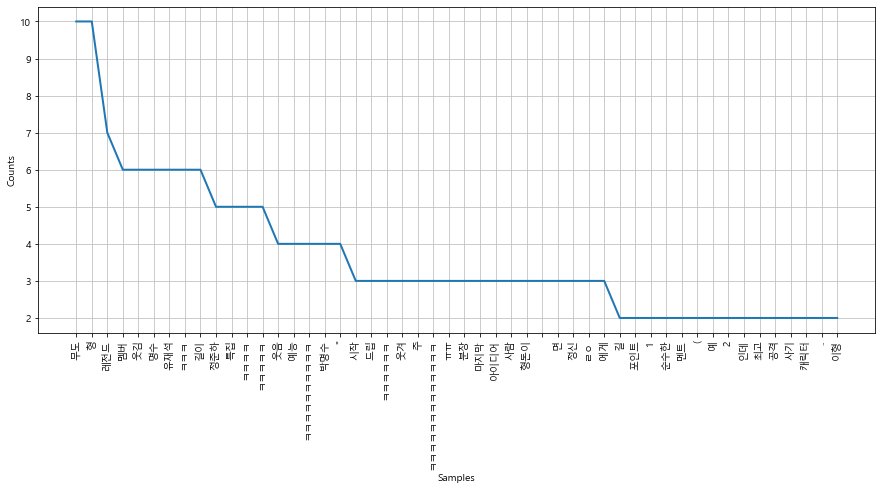

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz             
from sklearn.tree import export_graphviz
plt.figure(figsize=(15,6))
ko.plot(50) #상위 50개만 가져와라
plt.show()

In [58]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

In [59]:
data = ko.vocab().most_common(200)
data

[('무도', 10),
 ('형', 10),
 ('레전드', 7),
 ('멤버', 6),
 ('웃김', 6),
 ('명수', 6),
 ('유재석', 6),
 ('ㅋㅋㅋ', 6),
 ('길이', 6),
 ('정준하', 5),
 ('특집', 5),
 ('ㅋㅋㅋㅋ', 5),
 ('ㅋㅋㅋㅋㅋ', 5),
 ('웃음', 4),
 ('예능', 4),
 ('ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ', 4),
 ('박명수', 4),
 ('"', 4),
 ('시작', 3),
 ('드립', 3),
 ('ㅋㅋㅋㅋㅋㅋ', 3),
 ('웃겨', 3),
 ('주', 3),
 ('ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ', 3),
 ('ㅠㅠ', 3),
 ('분장', 3),
 ('마지막', 3),
 ('아이디어', 3),
 ('사람', 3),
 ('형돈이', 3),
 ('\n\n', 3),
 ('면', 3),
 ('정신', 3),
 ('ㄹㅇ', 3),
 ('에게', 3),
 ('길', 2),
 ('포인트', 2),
 ('1', 2),
 ('순수한', 2),
 ('멘트', 2),
 ('(', 2),
 ('예', 2),
 ('2', 2),
 ('인데', 2),
 ('최고', 2),
 ('공격', 2),
 ('사기', 2),
 ('캐릭터', 2),
 ('..', 2),
 ('이형', 2),
 ('있다는게', 2),
 ('눈치', 2),
 ('ㅋㅋㅋㅋㅋㅋㅋㅋㅋ', 2),
 ('재밌음', 2),
 ('자막', 2),
 ('좋다', 2),
 ('줄', 2),
 ('알았는데', 2),
 ('쩌리', 2),
 ('짱', 2),
 ('공주', 2),
 ('애드립', 2),
 ('ㅋㅋ', 2),
 ('모음', 2),
 ('난', 2),
 ('노홍철', 2),
 ('친구', 2),
 ('지금', 2),
 ('계속', 2),
 ('제대로', 2),
 ('정도', 2),
 ('자체', 2),
 ('입', 2),
 ('황태', 2),
 ('관리', 2),
 ('내', 2),
 ('해서', 2),
 ('ㅋㅋㅋㅋㅋㅋㅋ', 2),
 ('저렇게', 2),
 

In [60]:
# dict(data)로 하니 오류가 떠서 while반복문 사용
d ={}
n = 200
i = 0
while i < n:
    a,_ = data[i]
    _,b = data[i]
    d[a] = b
    i = i+1

d

{'무도': 10,
 '형': 10,
 '레전드': 7,
 '멤버': 6,
 '웃김': 6,
 '명수': 6,
 '유재석': 6,
 'ㅋㅋㅋ': 6,
 '길이': 6,
 '정준하': 5,
 '특집': 5,
 'ㅋㅋㅋㅋ': 5,
 'ㅋㅋㅋㅋㅋ': 5,
 '웃음': 4,
 '예능': 4,
 'ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ': 4,
 '박명수': 4,
 '"': 4,
 '시작': 3,
 '드립': 3,
 'ㅋㅋㅋㅋㅋㅋ': 3,
 '웃겨': 3,
 '주': 3,
 'ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ': 3,
 'ㅠㅠ': 3,
 '분장': 3,
 '마지막': 3,
 '아이디어': 3,
 '사람': 3,
 '형돈이': 3,
 '\n\n': 3,
 '면': 3,
 '정신': 3,
 'ㄹㅇ': 3,
 '에게': 3,
 '길': 2,
 '포인트': 2,
 '1': 2,
 '순수한': 2,
 '멘트': 2,
 '(': 2,
 '예': 2,
 '2': 2,
 '인데': 2,
 '최고': 2,
 '공격': 2,
 '사기': 2,
 '캐릭터': 2,
 '..': 2,
 '이형': 2,
 '있다는게': 2,
 '눈치': 2,
 'ㅋㅋㅋㅋㅋㅋㅋㅋㅋ': 2,
 '재밌음': 2,
 '자막': 2,
 '좋다': 2,
 '줄': 2,
 '알았는데': 2,
 '쩌리': 2,
 '짱': 2,
 '공주': 2,
 '애드립': 2,
 'ㅋㅋ': 2,
 '모음': 2,
 '난': 2,
 '노홍철': 2,
 '친구': 2,
 '지금': 2,
 '계속': 2,
 '제대로': 2,
 '정도': 2,
 '자체': 2,
 '입': 2,
 '황태': 2,
 '관리': 2,
 '내': 2,
 '해서': 2,
 'ㅋㅋㅋㅋㅋㅋㅋ': 2,
 '저렇게': 2,
 '웃기': 2,
 '여서': 2,
 '거': 2,
 '이건': 2,
 '됨': 2,
 '둘': 2,
 '개그맨': 2,
 '있는': 2,
 '시청자': 2,
 '성공하고': 2,
 '더': 2,
 '무': 1,
 '근본': 1,
 '‘': 1,
 '요즘': 1,
 '벌이': 1,
 

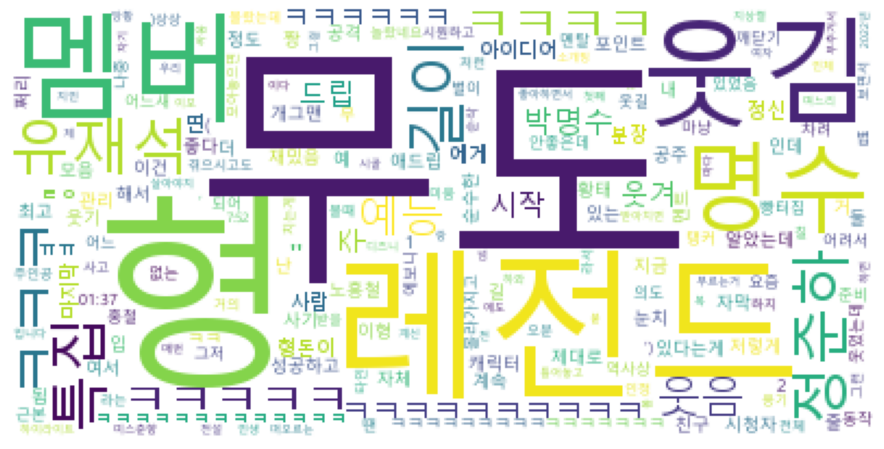

In [61]:
# 워드클라우드를 그려보자
wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',  # 윈도우:'c:/Windows/Fonts/malgun.ttf'
                      relative_scaling = 0.2, 
                      #stopwords=STOPWORDS,
                      background_color='white',
                      ).generate_from_frequencies(d)
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()